In [1]:
%pip install kagglehub
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ruchi798/data-science-job-salaries")

print("Path to dataset files:", path)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.0/68.0 kB 10.2 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
/root/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 7.37k/7.37k [00:00<00:00, 11.2MB/s]Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/ruchi798/data-science-job-salaries/versions/1



In [2]:
# imports

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
%matplotlib inline



In [3]:
df = pd.read_csv(path + "/ds_salaries.csv")
df

Unnamed: 0  work_year experience_level employment_type  \
0             0       2020               MI              FT   
1             1       2020               SE              FT   
2             2       2020               SE              FT   
3             3       2020               MI              FT   
4             4       2020               SE              FT   
..          ...        ...              ...             ...   
602         602       2022               SE              FT   
603         603       2022               SE              FT   
604         604       2022               SE              FT   
605         605       2022               SE              FT   
606         606       2022               MI              FT   

                      job_title  salary salary_currency  salary_in_usd  \
0                Data Scientist   70000             EUR          79833   
1    Machine Learning Scientist  260000             USD         260000   
2             Big Data Engineer   85000             GBP         109024   
3          Product Data Analyst   20000             USD          20000   
4     Machine Learning Engineer  150000             USD         150000   
..                          ...     ...             ...            ...   
602               Data Engineer  154000             USD         154000   
603               Data Engineer  126000             USD         126000   
604                Data Analyst  129000             USD         129000   
605                Data Analyst  150000             USD         150000   
606                AI Scientist  200000             USD         200000   

    employee_residence  remote_ratio company_location company_size  
0                   DE             0               DE            L  
1                   JP             0               JP            S  
2                   GB            50               GB            M  
3                   HN             0               HN            S  
4                   US            50               US            L  
..                 ...           ...              ...          ...  
602                 US           100               US            M  
603                 US           100               US            M  
604                 US             0               US            M  
605                 US           100               US            M  
606                 IN           100               US            L  

[607 rows x 12 columns]

# Data Science Job Salaries

The dataset contains compensation details for several job titles within the field of data science from the years 2020 to 2022. It covers salary figures, employment type, company location, and other contextual details. This dataset seeks to offer insight into how characteristics such as job title, company size, and geographical location affect salaries in the data science industry.

## Collection Process

The creator of the dataset, Ruch Bhatia, compiled the data from publicly available job boards and anonymous submissions to platforms that collect salary data from professionals. It was further aggregated and curated to reflect trends across different years and roles.

### Implications of the Collection Method

- Voluntary Submission Bias - The data relies on voluntary contributions; there is a potential self-selection bias, meaning only individuals willing to share their salaries are represented. This may not accurately reflect the industry average and/or distribution.

- Geographical Bias - Most submissions appear to be from countries with active technology sectors (e.g. United States, Indida), which may limit the generalizability of findings to global trends.

- Limited Verification - There is no confirmation mechanism for the reported figures, which could lead to inaccurate or inflated salaries.

## Structure of the Dataset

- Filename - ds_salaries.csv

- Observations (rows) - 607

- Variables (columns) - 11

- Structure - Each row represents a unique job position or salary entry. Each column represents a specific attribute of that job

## Variable Descriptions

- work_year - The year the salary was reported (e.g., 2020 to 2022).

- experience_level - The level of professional experience: EN - Entry-level, MI - Mid-level, SE - Senior-level, EX - Executive-level

- employment_type - The type of employment contract: FT - Full-time, PT - Part-time, CT - Contract, FL - Freelance

- job_title - The specific title of the data-related job (e.g., Data Scientist, ML Engineer).

- salary - The reported gross annual salary in the original currency.

- salary_currency - The currency code (ISO 4217) of the original salary (e.g., USD, EUR, GBP).

- salary_in_usd - The converted annual salary in USD (standardized for comparison).

- employee_residence - The country where the employee resides.

- remote_ratio - The percentage of remote work: 0 - No remote, 50 - Hybrid, 100 - Fully remote

- company_location - The country where the employer is located.

- company_size - The size of the company: S - Small (<50 employees), M - Medium (50–250), L - Large (>250)

All variables contribute context to the salary data, helping identify trends based on employment settings, geography, and organizational structure.

<hr>

# Data Cleaning

## Inspect the Raw Data

In [4]:
print("Shape →", df.shape)
df.info()
df.describe()
df.nunique()

Shape → (607, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


Unnamed: 0            607
work_year               3
experience_level        4
employment_type         4
job_title              50
salary                272
salary_currency        17
salary_in_usd         369
employee_residence     57
remote_ratio            3
company_location       50
company_size            3
dtype: int64

## Drop Old Index Column

In [5]:
df = df.drop(columns=[c for c in df.columns if c.lower().startswith("unnamed")])

## Standardize Categorical Spellings

In [6]:
df["job_title"] = (
    df["job_title"]
    .str.strip()
    .str.title()
)

exp_map = {
    "EN": "Entry-level/Junior",
    "MI": "Mid-level",
    "SE": "Senior-level",
    "EX": "Executive",
}
df["experience_level"] = df["experience_level"].map(exp_map)

df["employment_type"] = df["employment_type"].map(
    {"FT": "Full-time", "PT": "Part-time", "CT": "Contract", "FL": "Freelance"}
)

df["company_size"] = df["company_size"].map(
    {"S": "Small (<50)", "M": "Medium (50-249)", "L": "Large (250+)"}
)

df["remote_ratio"] = df["remote_ratio"].map(
    {0: "On-site", 50: "Hybrid", 100: "Fully remote"}
)

df["salary_currency"] = df["salary_currency"].str.upper()

## Handle Duplicates

In [7]:
before = len(df)
df = df.drop_duplicates()
print(f"Removed {before - len(df)} exact duplicate rows.")

Removed 42 exact duplicate rows.


## Correct dtypes

In [8]:
df = df.copy()                     

num_cols = ["salary", "salary_in_usd", "work_year"]
for col in num_cols:
    df.loc[:, col] = pd.to_numeric(df[col], errors="coerce")

cat_cols = [
    "experience_level",
    "employment_type",
    "job_title",
    "salary_currency",
    "employee_residence",
    "company_location",
    "company_size",
    "remote_ratio",
]
for col in cat_cols:
    df.loc[:, col] = df[col].astype("category")

## Check for Missing Values in the Variables

In [9]:
missing = df.isna().sum().sort_values(ascending=False)
print(missing[missing > 0])

Series([], dtype: int64)


## Save the Cleaned Dataset

In [10]:
clean_path = f"{path}/ds_salaries_cleaned.csv"
df.to_csv(clean_path, index=False)
print("Cleaned file written to →", clean_path)

Cleaned file written to → /root/.cache/kagglehub/datasets/ruchi798/data-science-job-salaries/versions/1/ds_salaries_cleaned.csv


In [11]:
df

work_year experience_level employment_type                   job_title  \
0         2020        Mid-level       Full-time              Data Scientist   
1         2020     Senior-level       Full-time  Machine Learning Scientist   
2         2020     Senior-level       Full-time           Big Data Engineer   
3         2020        Mid-level       Full-time        Product Data Analyst   
4         2020     Senior-level       Full-time   Machine Learning Engineer   
..         ...              ...             ...                         ...   
602       2022     Senior-level       Full-time               Data Engineer   
603       2022     Senior-level       Full-time               Data Engineer   
604       2022     Senior-level       Full-time                Data Analyst   
605       2022     Senior-level       Full-time                Data Analyst   
606       2022        Mid-level       Full-time                Ai Scientist   

     salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0     70000             EUR          79833                 DE       On-site   
1    260000             USD         260000                 JP       On-site   
2     85000             GBP         109024                 GB        Hybrid   
3     20000             USD          20000                 HN       On-site   
4    150000             USD         150000                 US        Hybrid   
..      ...             ...            ...                ...           ...   
602  154000             USD         154000                 US  Fully remote   
603  126000             USD         126000                 US  Fully remote   
604  129000             USD         129000                 US       On-site   
605  150000             USD         150000                 US  Fully remote   
606  200000             USD         200000                 IN  Fully remote   

    company_location     company_size  
0                 DE     Large (250+)  
1                 JP      Small (<50)  
2                 GB  Medium (50-249)  
3                 HN      Small (<50)  
4                 US     Large (250+)  
..               ...              ...  
602               US  Medium (50-249)  
603               US  Medium (50-249)  
604               US  Medium (50-249)  
605               US  Medium (50-249)  
606               US     Large (250+)  

[565 rows x 11 columns]

<hr>

In [12]:
count_per_year = df["work_year"].value_counts().sort_index()
print(count_per_year)



work_year
2020     72
2021    215
2022    278
Name: count, dtype: int64


# Exploratory Data Analysis

To gain a good understanding of our Data Science Job Salaries Dataset, this part of the notebook will explore the different information contained, as factors related to salary. The results from this analysis will be used to decide what kind of research question we can ask and try to answer through Data Modeling techniques.

To observe the relationship between these two variables, we can group our df by experience_level and describe the dataset based on salary_in_usd.

## EDA Question 1: How does the work_year impact the average salary in USD?

To understand how salaries evolve across the years, we can group the dataset by work_year  and compute summary statistics for salary_in_usd. This will give us an overview of central tendencies and dispersion across different years.

In [13]:
yearly_stats = df.groupby("work_year").describe()["salary_in_usd"]

yearly_stats["IQR"] = yearly_stats["75%"] - yearly_stats["25%"]
yearly_stats["variance"] = yearly_stats["std"] ** 2
yearly_stats

count           mean           std      min      25%       50%  \
work_year                                                                   
2020        72.0   95813.000000  82831.799222   5707.0  45724.5   75544.0   
2021       215.0   99430.413953  80304.317444   2859.0  50000.0   82528.0   
2022       278.0  123089.097122  59888.932893  10000.0  78791.0  120000.0   

                75%       max      IQR      variance  
work_year                                             
2020       115526.0  450000.0  69801.5  6.861107e+09  
2021       135000.0  600000.0  85000.0  6.448783e+09  
2022       160000.0  405000.0  81209.0  3.586684e+09

### Question 1 Visualizations

To clearly observe how salaries evolve across years, we can generate both line charts and boxplots.

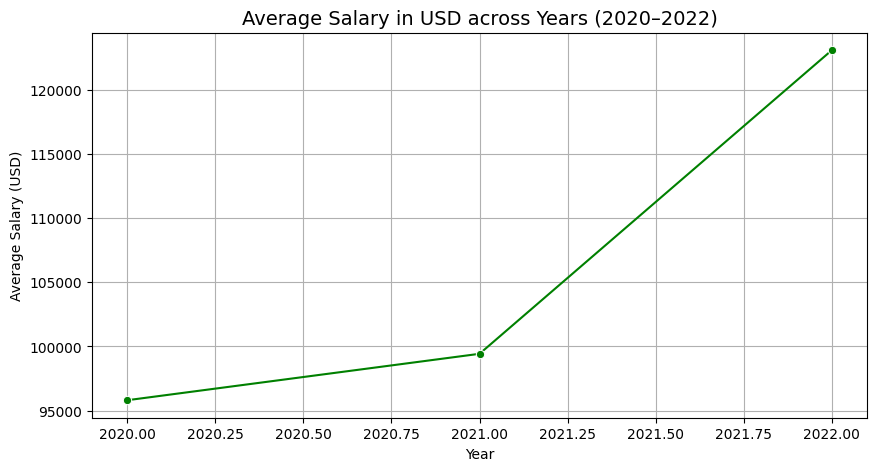

In [14]:
avg_salary_by_year = df.groupby("work_year")["salary_in_usd"].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=avg_salary_by_year, x="work_year", y="salary_in_usd", marker="o", color="green")
plt.title("Average Salary in USD across Years (2020–2022)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Average Salary (USD)")
plt.grid(True)
plt.show()

The plot illustrates the trend in average salaries over three years (2020–2022), highlighting a gradual rise from roughly $95,800 in 2020 to approximately $123,100 in 2022. This shift suggests that while salaries remained relatively stable during the pandemic, the post‑pandemic recovery and growing demand for data-related roles led to a significant rise in average compensation. Some further insights derived from the plot include:

* **Consistent Growth Pattern**
    * The average salary increased steadily from roughly USD 95,800 in 2020 to roughly USD 99,430 in 2021, followed by a significant jump to roughly USD 123,089 in 2022.

* **Possible Impacts of the Pandemic**
    * The relatively lower salaries in 2020 align with the height of the pandemic, when economic uncertainty and hiring freezes were prevalent across many industries, including tech and data roles.

* **Post‑Pandemic Recovery and Surge**
    * By 2022, as businesses adapted to remote and digital-first strategies, demand for data professionals surged. This shift is reflected in the noticeable rise in average salaries, suggesting a stronger market and higher compensation to attract critical talent.


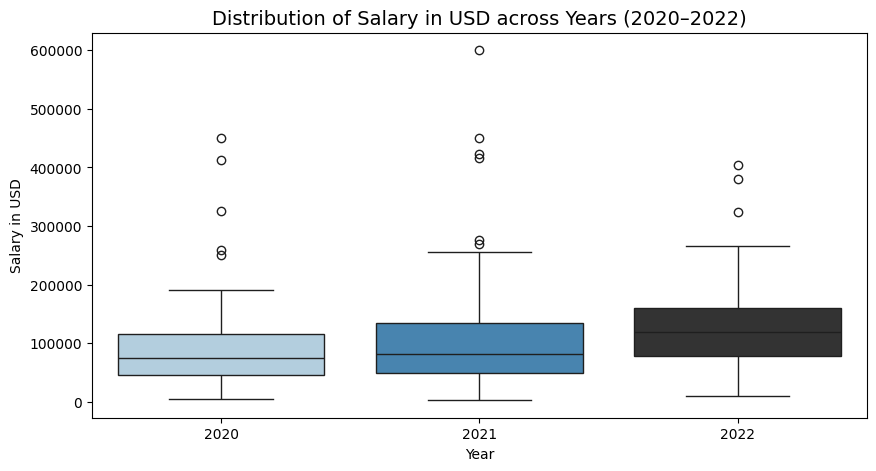

In [15]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="work_year", y="salary_in_usd", 
            hue="work_year",  # uses work_year for color assignment
            dodge=False,     
            palette="Blues_d", 
            legend=False)     
plt.title("Distribution of Salary in USD across Years (2020–2022)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Salary in USD")
plt.show()


The box plot compares the distribution of salaries across three years (2020–2022), showing a noticeable upward shift in central tendency and range over time. Median salaries rise from roughly $75,500 in 2020 to $120,000 in 2022, highlighting a significant increase in typical pay as the data field evolved post‑pandemic.

* **Rising Central Tendency**
    * The median salary increased sharply from approximately 75,544 in 2020 to 120,000 in 2022, indicating that typical salaries grew significantly as market conditions recovered post‑pandemic.

* **Increasing Variability**
    * The Interquartile Range (IQR), which captures the middle 50% of salaries, grew from roughly 69,800 in 2020 to roughly 81,209 in 2022. This suggests that salary distribution became more dispersed over time, highlighting a broader range of roles and compensation packages

* **Higher Extremes and Outliers**
    * The maximum salary rose from 450,000 in 2020 to 600,000 in 2021 and 405,000 in 2022, suggesting the presence of high‑earning outliers, especially in the post‑pandemic period when demand for senior roles surged.

* **Decline in Variance**
    * Variance dropped from roughly 6.86 billion in 2020 to 3.59 billion in 2022, implying that despite the higher salaries and wider IQR, salaries became relatively more clustered as the market matured and standardized for certain roles and experience levels.

## EDA Question 2: Is it safe to slice the data annually? What are the differences & relationships between the years 2020, 2021, and 2022?

### Question 2 Visualizations

Mean (95 % CI by normal theory)

In [16]:
summary = (
    df.groupby("work_year")["salary_in_usd"]
    .agg(
        n="count",
        mean="mean",
        std="std"
    )
    .reset_index()
)
summary["se"] = summary["std"] / np.sqrt(summary["n"])
summary["ci95_low"] = summary["mean"] - 1.96 * summary["se"]
summary["ci95_high"] = summary["mean"] + 1.96 * summary["se"]
summary_rounded = summary.round({"mean": 0, "std": 0, "se": 0})
summary_rounded

work_year    n      mean      std      se       ci95_low      ci95_high
0       2020   72   95813.0  82832.0  9762.0   76679.830537  114946.169463
1       2021  215   99430.0  80304.0  5477.0   88696.064327  110164.763580
2       2022  278  123089.0  59889.0  3592.0  116048.974100  130129.220144

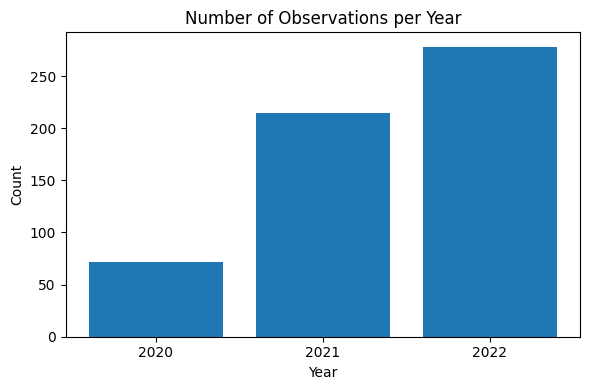

In [17]:
plt.figure(figsize=(6,4))
plt.bar(summary["work_year"].astype(str), summary["n"])
plt.title("Number of Observations per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

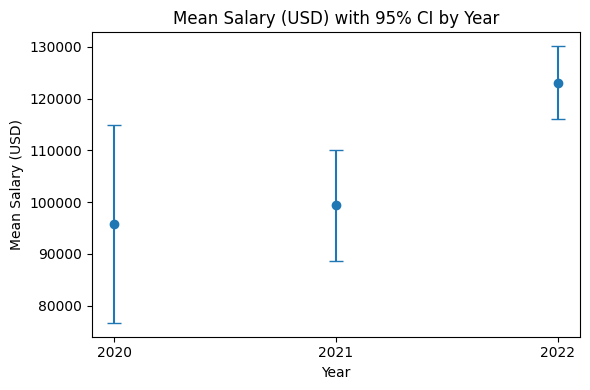

In [18]:
plt.figure(figsize=(6,4))
plt.errorbar(
    summary["work_year"].astype(str),
    summary["mean"],
    yerr=1.96 * summary["se"],
    fmt='o', capsize=5
)
plt.title("Mean Salary (USD) with 95% CI by Year")
plt.xlabel("Year")
plt.ylabel("Mean Salary (USD)")
plt.tight_layout()
plt.show()

Outliers directly affect both the dot (mean) and the CI length (via a larger SD). 2020’s mean is noticeably inflated by a few $400 k – $600 k salaries, and its CI (± ≈ $18 k) is widest because n = 72 is the smallest year slice.

<hr>

5 % Trimmed Mean (95 % CI)

In [19]:
trim_rows = []

for yr, grp in df.groupby("work_year"):
    s = grp["salary_in_usd"].dropna()
    # keep middle 90 %
    lower, upper = s.quantile(0.05), s.quantile(0.95)
    trimmed = s[(s >= lower) & (s <= upper)]

    n  = trimmed.size
    tm = trimmed.mean()
    sd = trimmed.std(ddof=1)
    se = sd / np.sqrt(n)                 # CLT on trimmed data
    ci_low, ci_high = tm - 1.96*se, tm + 1.96*se

    trim_rows.append([yr, grp.size, n, tm, ci_low, ci_high])

trim_summary = pd.DataFrame(
    trim_rows,
    columns=["work_year", "n_total", "n_used", "trim_mean",
             "ci95_low", "ci95_high"]
).round(0)
trim_summary

work_year  n_total  n_used  trim_mean  ci95_low  ci95_high
0       2020      792      64    84776.0   73124.0    96428.0
1       2021     2365     195    90613.0   83178.0    98049.0
2       2022     3058     250   120613.0  114877.0   126348.0

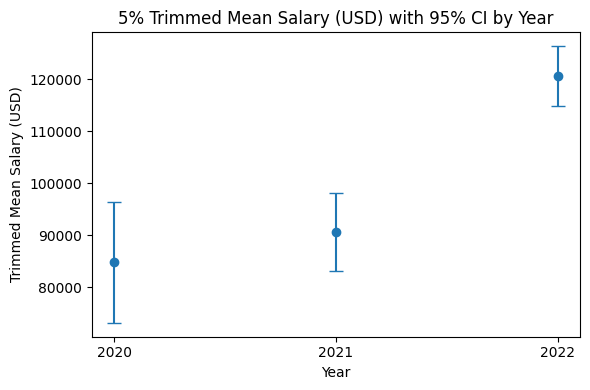

In [20]:
plt.figure(figsize=(6,4))
plt.errorbar(
    trim_summary["work_year"].astype(str),
    trim_summary["trim_mean"],
    yerr=[trim_summary["trim_mean"] - trim_summary["ci95_low"],
          trim_summary["ci95_high"] - trim_summary["trim_mean"]],
    fmt='o', capsize=5
)
plt.title("5% Trimmed Mean Salary (USD) with 95% CI by Year")
plt.xlabel("Year")
plt.ylabel("Trimmed Mean Salary (USD)")
plt.tight_layout()
plt.show()

Drops the lowest + highest 5 % of salaries each year, then averages the remaining 90 %. This shrinks 2020’s centre from ≈ $96 k → $85 k and narrows its CI to ± ≈ $11 k. The trimmed mean preserves the intuitive feel of “average pay” while muting the leverage of extreme rows.

<hr>

Median (95 % CI)

In [21]:
med_rows = []

for yr, grp in df.groupby("work_year"):
    s  = grp["salary_in_usd"].dropna()
    n  = s.size
    md = np.median(s)

    #approx SE of median ≈ 1.253 * SD / square root of n,,,
    sd = s.std(ddof=1)
    se = 1.253 * sd / np.sqrt(n)
    ci_low, ci_high = md - 1.96*se, md + 1.96*se

    med_rows.append([yr, n, md, ci_low, ci_high])

med_summary = pd.DataFrame(
    med_rows,
    columns=["work_year", "n", "median", "ci95_low", "ci95_high"]
).round(0)
med_summary

work_year    n    median  ci95_low  ci95_high
0       2020   72   75544.0   51570.0    99518.0
1       2021  215   82528.0   69078.0    95978.0
2       2022  278  120000.0  111179.0   128821.0

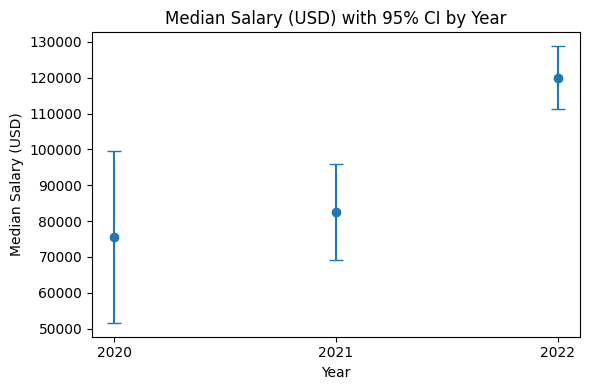

In [22]:




plt.figure(figsize=(6,4))
plt.errorbar(
    med_summary["work_year"].astype(str),
    med_summary["median"],
    yerr=[med_summary["median"] - med_summary["ci95_low"],
          med_summary["ci95_high"] - med_summary["median"]],
    fmt='o', capsize=5
)
plt.title("Median Salary (USD) with 95% CI by Year")
plt.xlabel("Year")
plt.ylabel("Median Salary (USD)")
plt.tight_layout()
plt.show()

The median is the 50-th percentile which is immune to outliers. Because it uses only ranks, its CI is widest when n is small; 2020’s band spans about $40 k.

### How the three measures relate?

| Year | Mean (USD)  | 5 % Trimmed Mean (USD) | Median (USD) | Explanation                                                                          |
| ---- | ----------- | ---------------------- | ------------ | ----------------------------------------------------------------------------------------- |
| 2020 | 96 k ± 18 k | 85 k ± 11 k            | 76 k ± 20 k  | Outliers lift the raw mean; trimmed mean and median reveal lower “typical” pay.           |
| 2021 | 99 k ± 11 k | 90 k ± 7 k             | 83 k ± 9 k   | Same pattern: right-tail earners push mean > median.                                      |
| 2022 | 123 k ± 8 k | 121 k ± 6 k            | 120 k ± 6 k  | Distribution is more symmetric; all three converge and CIs are tight thanks to *n* = 278. |


- Mean tracks the overall payroll burden - good for corporate finance questions.

- Trimmed mean is a robust average - ideal for modeling without discarding too much data.

- Median captures the typical individual’s income - best for employee-centered insights.

### Can the dataset be sliced by year?

2022

278 rows push well past the “rule-of-30” for almost any classical test; even a 10-way stratification leaves ≈ 28 obs per cell. All estimators (mean, trimmed mean, median) give 95 % CIs under ± 8 k, or < 7 % of the centre. No empty cells across common categorical drivers, so nothing gets silently dropped in regression models.

Verdict: 2022 can be sliced without worrying about statistical fragility.

2021

n = 215 is still ample for main-effect models. However, the smallest cells dip to single digits when three-way interactions (e.g., experience × remote × size) are layered in. The mean CI is ± 11 k; the trimmed mean is ± 7 k. It's tight enough to detect ≥ 10 k differences but may blur subtler effects (e.g., junior vs. mid-level pay gaps of ~5 k).

Verdict: 2021 can be analyzed separately, but consider merging it with 2022 for a layered interaction.

2020

Hiring freezes and a few very high hazard pay salaries produce a fat-tailed distribution. The sample size of n = 72 leaves wide CIs; dropping a single $450k outlier shifts the mean by > $6k (≈ 7%). Over one-third of the 27 combo cells are empty; any model with those factors silently discards 20–40 % of 2020 rows. 

Verdict: Keep 2020 only for visual context (pandemic dip) or an “early-pandemic” outlier. Avoid standalone significance tests inside 2020; power is low and Type II errors are likely.

| Analysis                                         | 2020                             | 2021                                      | 2022               |
| ----------------------------------------------------- | -------------------------------- | ----------------------------------------- | ------------------ |
| **High-level descriptives** (line/box plots, medians) | ✔ (with outlier note)            | ✔                                         | ✔                  |
| **Main-effect regression** (≤ 2 categorical drivers)  | ✔ (pooled with dummy)            | ✔ (stand-alone OK)                        | ✔                  |
| **Fine-grained cross-tabs / 3-way interactions**      | ✘ (unstable)                     | ↔ merge with 2022 or collapse rare levels | ✔                  |
| **Presentation focus**                                | Pandemic | Transitional year                         | Core evidence year |


Slice 2022 and 2021 freely for detailed insights, pool them (or use a work_year dummy) for modeling, and/or treat 2020 as an outlier

## EDA Question 3: Did the remote-work salary widen from 2021 to 2022?

### Question 3 Visualizations

In [23]:
df_stable = df[df["work_year"].isin([2021, 2022])].copy()

med_remote = (
    df_stable.pivot_table(
        values="salary_in_usd",
        index="work_year",
        columns="remote_ratio",
        aggfunc="median"
    )
    .reindex([2021, 2022])          # ensure correct row order
    .round(0)
)

med_remote["remote_premium_abs"] = med_remote["Fully remote"] - med_remote["On-site"]
med_remote["remote_premium_pct"] = (
    med_remote["remote_premium_abs"] / med_remote["On-site"] * 100
).round(1)

med_remote

remote_ratio  Fully remote   Hybrid   On-site  remote_premium_abs  \
work_year                                                           
2021               91500.0  63831.0   80916.0             10584.0   
2022              123595.0  90065.0  110900.0             12695.0   

remote_ratio  remote_premium_pct  
work_year                         
2021                        13.1  
2022                        11.4

Companies spent more real money to secure fully-remote talent in 2022. This is seen from the absolute dollar gap of +$ 2.1 k (from $10.6 k → $12.7 k). Moreover, on-site salaries rose faster in relative terms, so the proportional premium narrowed slightly by  1.7 pp (from 13.1 % → 11.4 %).

<Figure size 800x500 with 0 Axes>

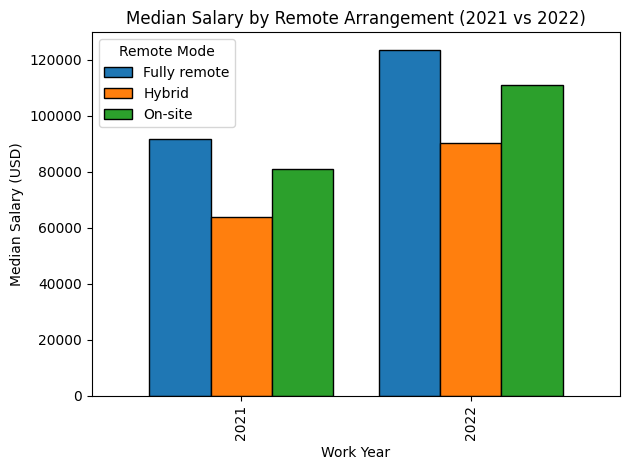

In [24]:
plt.figure(figsize=(8,5))
med_remote.drop(columns=["remote_premium_abs", "remote_premium_pct"]).plot(
    kind="bar", edgecolor="black", width=0.8
)
plt.title("Median Salary by Remote Arrangement (2021 vs 2022)")
plt.xlabel("Work Year")
plt.ylabel("Median Salary (USD)")
plt.legend(title="Remote Mode", loc="upper left")
plt.tight_layout()
plt.show()


In 2021, it is noticeable that:

- The On-site bar is higher than Hybrid but clearly shorter than Fully remote.

- The Fully remote bar stands out as the tallest, confirming that remote jobs had a pay edge.

Moving to 2022, all three bars are taller, showing that salaries rose across the board.
But the pattern shifted subtly:

- On-site pay increased substantially, narrowing the visual gap with Fully remote.

- Hybrid pay jumped even more in relative terms, almost catching up to On-site.

This means that while Fully remote is still the highest, the difference between on-site and fully remote shrank proportionally, even though the dollar gap grew. In raw dollars, remote work continued to lead, and its advantage grew from ~$10.6k to ~$12.7k. However, the percentage gap, which is evident in the proportional height of the bar, slightly decreased. The result reflects a market adjusting as remote work became mainstream and companies increased in-office pay to stay competitive.

The chart illustrates that while remote work remained the best-paid option in 2022, the relative gap shrank as on-site salaries caught up faster, and the absolute pay difference continued to increase.

## EDA Question 4: 

# Research Question

## For distinct categories of data-related roles (Data Science/ML, Data Engineering/Architecture, Data Analytics/BI, and Data Leadership/Management), does the relationship between experience_level and salary_in_usd significantly vary based on company_size,  remote_ratio (on-site, hybrid, or fully remote), and whether the company_location is in an established tech hub versus other regions, between 2021 and 2022?

## Additional Preprocessing Steps

### Filtering the Dataframe to only include rows from 2021 to 2022

todo: why

In [25]:
df_2021_2022 = df[df["work_year"].isin([2021, 2022])]
df_2021_2022

work_year    experience_level employment_type           job_title  \
72        2021  Entry-level/Junior       Full-time  Research Scientist   
73        2021           Executive       Full-time     Bi Data Analyst   
74        2021           Executive       Full-time        Head Of Data   
75        2021        Senior-level       Full-time      Data Scientist   
76        2021           Mid-level       Full-time     Bi Data Analyst   
..         ...                 ...             ...                 ...   
602       2022        Senior-level       Full-time       Data Engineer   
603       2022        Senior-level       Full-time       Data Engineer   
604       2022        Senior-level       Full-time        Data Analyst   
605       2022        Senior-level       Full-time        Data Analyst   
606       2022           Mid-level       Full-time        Ai Scientist   

     salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
72    60000             GBP          82528                 GB        Hybrid   
73   150000             USD         150000                 IN  Fully remote   
74   235000             USD         235000                 US  Fully remote   
75    45000             EUR          53192                 FR        Hybrid   
76   100000             USD         100000                 US  Fully remote   
..      ...             ...            ...                ...           ...   
602  154000             USD         154000                 US  Fully remote   
603  126000             USD         126000                 US  Fully remote   
604  129000             USD         129000                 US       On-site   
605  150000             USD         150000                 US  Fully remote   
606  200000             USD         200000                 IN  Fully remote   

    company_location     company_size  
72                GB     Large (250+)  
73                US     Large (250+)  
74                US     Large (250+)  
75                FR     Large (250+)  
76                US  Medium (50-249)  
..               ...              ...  
602               US  Medium (50-249)  
603               US  Medium (50-249)  
604               US  Medium (50-249)  
605               US  Medium (50-249)  
606               US     Large (250+)  

[493 rows x 11 columns]

### Tech Hub Binning

todo: explanation

In [26]:
# based on the top 10 tech hubs in the world
# source: domain knowledge -https://allenrec.com/technology-hub-countries/

tech_hubs = ['US', 'DE', 'CN', 'FR', 'NL', 'ES', 'JP', 'AU']

# bin the company_location column
df_2021_2022['company_location_tech_hub'] = df_2021_2022['company_location'].apply(lambda x: 1 if x in tech_hubs else 0)

df

/tmp/ipykernel_106/633647160.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021_2022['company_location_tech_hub'] = df_2021_2022['company_location'].apply(lambda x: 1 if x in tech_hubs else 0)


work_year experience_level employment_type                   job_title  \
0         2020        Mid-level       Full-time              Data Scientist   
1         2020     Senior-level       Full-time  Machine Learning Scientist   
2         2020     Senior-level       Full-time           Big Data Engineer   
3         2020        Mid-level       Full-time        Product Data Analyst   
4         2020     Senior-level       Full-time   Machine Learning Engineer   
..         ...              ...             ...                         ...   
602       2022     Senior-level       Full-time               Data Engineer   
603       2022     Senior-level       Full-time               Data Engineer   
604       2022     Senior-level       Full-time                Data Analyst   
605       2022     Senior-level       Full-time                Data Analyst   
606       2022        Mid-level       Full-time                Ai Scientist   

     salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0     70000             EUR          79833                 DE       On-site   
1    260000             USD         260000                 JP       On-site   
2     85000             GBP         109024                 GB        Hybrid   
3     20000             USD          20000                 HN       On-site   
4    150000             USD         150000                 US        Hybrid   
..      ...             ...            ...                ...           ...   
602  154000             USD         154000                 US  Fully remote   
603  126000             USD         126000                 US  Fully remote   
604  129000             USD         129000                 US       On-site   
605  150000             USD         150000                 US  Fully remote   
606  200000             USD         200000                 IN  Fully remote   

    company_location     company_size  
0                 DE     Large (250+)  
1                 JP      Small (<50)  
2                 GB  Medium (50-249)  
3                 HN      Small (<50)  
4                 US     Large (250+)  
..               ...              ...  
602               US  Medium (50-249)  
603               US  Medium (50-249)  
604               US  Medium (50-249)  
605               US  Medium (50-249)  
606               US     Large (250+)  

[565 rows x 11 columns]

### Model Features and Label Setup

In [27]:
X = df_2021_2022[[
    'experience_level',
    'company_size',
    'remote_ratio',
    'company_location_tech_hub',
]]

y = df_2021_2022['salary_in_usd']

### Dummy Encoding Features

In [28]:
X_encoded = pd.get_dummies(X, drop_first=True)

In [29]:
X_encoded

company_location_tech_hub  experience_level_Executive  \
72                           0                       False   
73                           1                        True   
74                           1                        True   
75                           1                       False   
76                           1                       False   
..                         ...                         ...   
602                          1                       False   
603                          1                       False   
604                          1                       False   
605                          1                       False   
606                          1                       False   

     experience_level_Mid-level  experience_level_Senior-level  \
72                        False                          False   
73                        False                          False   
74                        False                          False   
75                        False                           True   
76                         True                          False   
..                          ...                            ...   
602                       False                           True   
603                       False                           True   
604                       False                           True   
605                       False                           True   
606                        True                          False   

     company_size_Medium (50-249)  company_size_Small (<50)  \
72                          False                     False   
73                          False                     False   
74                          False                     False   
75                          False                     False   
76                           True                     False   
..                            ...                       ...   
602                          True                     False   
603                          True                     False   
604                          True                     False   
605                          True                     False   
606                         False                     False   

     remote_ratio_Hybrid  remote_ratio_On-site  
72                  True                 False  
73                 False                 False  
74                 False                 False  
75                  True                 False  
76                 False                 False  
..                   ...                   ...  
602                False                 False  
603                False                 False  
604                False                  True  
605                False                 False  
606                False                 False  

[493 rows x 8 columns]

### Train Test Split

In [30]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

### Model Performance on Train and Test Sets

In [31]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def evaluate_model(model, X_train, X_test, y_train, y_test, name="Model", inverse=False):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Always calculate R² and RMSE based on provided labels
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    print(f"\n{name} Performance:")

    if inverse:
        # Print log-space metrics
        print(f"Train R² (log-space): {train_r2:.4f}")
        print(f"Test R²  (log-space): {test_r2:.4f}")
        print(f"Train RMSE (log-space): {train_rmse:.2f}")
        print(f"Test RMSE  (log-space): {test_rmse:.2f}")

        # Also compute RMSE in original scale
        y_train_orig = np.expm1(y_train)
        y_test_orig = np.expm1(y_test)
        y_train_pred_orig = np.expm1(y_train_pred)
        y_test_pred_orig = np.expm1(y_test_pred)

        train_rmse_orig = np.sqrt(mean_squared_error(y_train_orig, y_train_pred_orig))
        test_rmse_orig = np.sqrt(mean_squared_error(y_test_orig, y_test_pred_orig))

        print(f"Train RMSE (original scale): {train_rmse_orig:.2f}")
        print(f"Test RMSE  (original scale): {test_rmse_orig:.2f}")
    else:
        # For non-transformed targets, show just normal metrics
        print(f"Train R²:  {train_r2:.4f}")
        print(f"Test R²:   {test_r2:.4f}")
        print(f"Train RMSE: {train_rmse:.2f}")
        print(f"Test RMSE:  {test_rmse:.2f}")


# Data Modeling: Prediction Model

### Linear Regression Model Fitting

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
model = LinearRegression()
model.fit(X_train, y_train)

evaluate_model(model, X_train, X_test, y_train, y_test, "Linear Regression")


Linear Regression Performance:
Train R²:  0.3853
Test R²:   0.4330
Train RMSE: 57211.70
Test RMSE:  44295.06


### Model Predictions

In [34]:
predictions = model.predict(X_encoded)

df_2021_2022["predicted_salary"] = predictions

/tmp/ipykernel_106/3182939985.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021_2022["predicted_salary"] = predictions


In [35]:
df_2021_2022

work_year    experience_level employment_type           job_title  \
72        2021  Entry-level/Junior       Full-time  Research Scientist   
73        2021           Executive       Full-time     Bi Data Analyst   
74        2021           Executive       Full-time        Head Of Data   
75        2021        Senior-level       Full-time      Data Scientist   
76        2021           Mid-level       Full-time     Bi Data Analyst   
..         ...                 ...             ...                 ...   
602       2022        Senior-level       Full-time       Data Engineer   
603       2022        Senior-level       Full-time       Data Engineer   
604       2022        Senior-level       Full-time        Data Analyst   
605       2022        Senior-level       Full-time        Data Analyst   
606       2022           Mid-level       Full-time        Ai Scientist   

     salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
72    60000             GBP          82528                 GB        Hybrid   
73   150000             USD         150000                 IN  Fully remote   
74   235000             USD         235000                 US  Fully remote   
75    45000             EUR          53192                 FR        Hybrid   
76   100000             USD         100000                 US  Fully remote   
..      ...             ...            ...                ...           ...   
602  154000             USD         154000                 US  Fully remote   
603  126000             USD         126000                 US  Fully remote   
604  129000             USD         129000                 US       On-site   
605  150000             USD         150000                 US  Fully remote   
606  200000             USD         200000                 IN  Fully remote   

    company_location     company_size  company_location_tech_hub  \
72                GB     Large (250+)                          0   
73                US     Large (250+)                          1   
74                US     Large (250+)                          1   
75                FR     Large (250+)                          1   
76                US  Medium (50-249)                          1   
..               ...              ...                        ...   
602               US  Medium (50-249)                          1   
603               US  Medium (50-249)                          1   
604               US  Medium (50-249)                          1   
605               US  Medium (50-249)                          1   
606               US     Large (250+)                          1   

     predicted_salary  
72       32386.243644  
73      233886.255473  
74      233886.255473  
75      146114.130666  
76      112545.967912  
..                ...  
602     144691.879680  
603     144691.879680  
604     136736.006734  
605     144691.879680  
606     134889.107067  

[493 rows x 13 columns]

### Visualizing the Performance of our Regression Model

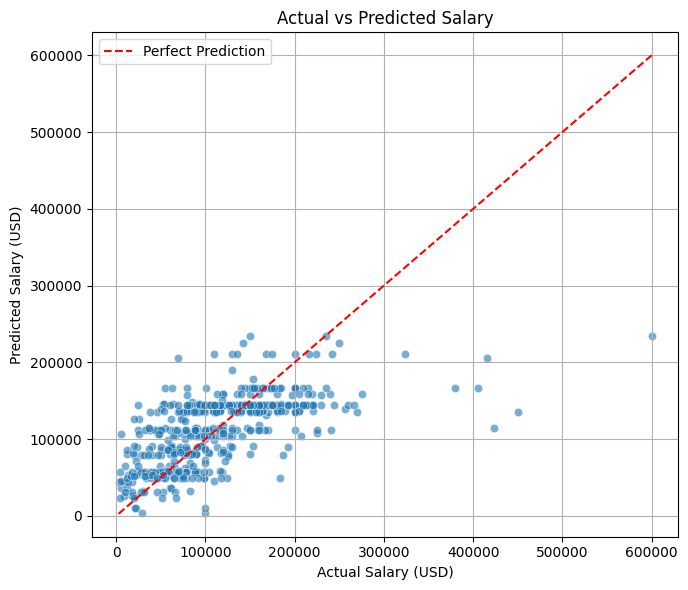

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 6))
sns.scatterplot(
    x=df_2021_2022["salary_in_usd"],
    y=df_2021_2022["predicted_salary"],
    alpha=0.6
)
plt.plot([df_2021_2022["salary_in_usd"].min(), df_2021_2022["salary_in_usd"].max()],
         [df_2021_2022["salary_in_usd"].min(), df_2021_2022["salary_in_usd"].max()],
         color='red', linestyle='--', label="Perfect Prediction")

plt.xlabel("Actual Salary (USD)")
plt.ylabel("Predicted Salary (USD)")
plt.title("Actual vs Predicted Salary")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


The scatter plot above shows how well our linear regression model predicted salaries compared to the actual values from the dataset.

- Each point represents one job entry, with the actual salary on the x-axis and the predicted salary on the y-axis.

- The red dashed line represents perfect predictions — if all points were on this line, the model would be 100% accurate.

- Most points are close to the line, especially for salaries below $200,000. This means the model does a decent job for common roles and salary levels.

However, there is an obvious issue:

- The model tends to underestimate very high salaries, especially for senior or rare roles, which in this case, can be considered as outliers.

The model captures general salary trends well, but struggles with extreme cases. It could be improved by using more advanced models, those that have higher variance, such as Polynomial Regression.

### Predicting Salaries Based on User Input

In [37]:
for col in X.columns:
    print(col)
    print(X[col].unique())

experience_options = X["experience_level"].unique().tolist()
company_size_options = X["company_size"].unique().tolist()
remote_options = X["remote_ratio"].unique().tolist()
company_location_tech_hub_options = X["company_location_tech_hub"].unique().tolist()

experience_level
['Entry-level/Junior' 'Executive' 'Senior-level' 'Mid-level']
company_size
['Large (250+)' 'Medium (50-249)' 'Small (<50)']
remote_ratio
['Hybrid' 'Fully remote' 'On-site']
company_location_tech_hub
[0 1]


In [38]:
experience_level_input = 'Executive'

In [39]:
company_size_input = 'Small (<50)'

In [40]:
company_location_tech_hub_input = '1'

In [41]:
remote_type_input = 'Hybrid'

In [42]:
user_input = pd.DataFrame([{
    'experience_level': experience_level_input,
    'company_size': company_size_input,
    'remote_ratio': remote_type_input,
    'company_location_tech_hub': company_location_tech_hub_input
}])

user_encoded = pd.get_dummies(user_input)

user_encoded = user_encoded.reindex(columns=X_encoded.columns, fill_value=0)

predicted_salary = model.predict(user_encoded)[0]

print(f"Predicted Salary (USD): ${predicted_salary:,.2f}")

Predicted Salary (USD): $129,756.18


## Model Improvements

In [43]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

### Regularization - Ridge Regression

In [44]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

evaluate_model(ridge_model, X_train, X_test, y_train, y_test, "Ridge Regression")


Ridge Regression Performance:
Train R²:  0.3847
Test R²:   0.4364
Train RMSE: 57240.98
Test RMSE:  44165.16


### Regularization - Lasso Regression

In [45]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

evaluate_model(lasso_model, X_train, X_test, y_train, y_test, "Lasso Regression")


Lasso Regression Performance:
Train R²:  0.3853
Test R²:   0.4331
Train RMSE: 57211.70
Test RMSE:  44294.93


Improvements are minimal... etc ... explain this 

### Target Transformation - Log Transformation

reduces skewness or something

In [46]:
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)


In [47]:
# normal linear regression refit

log_model = LinearRegression()
log_model.fit(X_train, y_train_log)

evaluate_model(log_model, X_train, X_test, y_train_log, y_test_log, "Log-Transformed Linear Regression", inverse=True)


Log-Transformed Linear Regression Performance:
Train R² (log-space): 0.4359
Test R²  (log-space): 0.4296
Train RMSE (log-space): 0.58
Test RMSE  (log-space): 0.55
Train RMSE (original scale): 58566.11
Test RMSE  (original scale): 44201.44


### Log Transformation with Regularization

In [48]:
log_ridge_model = Ridge(alpha=1.0)
log_ridge_model.fit(X_train, y_train_log)

evaluate_model(log_ridge_model, X_train, X_test, y_train_log, y_test_log, "Log-Transformed Ridge Regression", inverse=True)


Log-Transformed Ridge Regression Performance:
Train R² (log-space): 0.4353
Test R²  (log-space): 0.4330
Train RMSE (log-space): 0.58
Test RMSE  (log-space): 0.55
Train RMSE (original scale): 58777.54
Test RMSE  (original scale): 44172.36


In [49]:
log_lasso_model = Lasso(alpha=0.1)
log_lasso_model.fit(X_train, y_train_log)

evaluate_model(log_lasso_model, X_train, X_test, y_train_log, y_test_log, "Log-Transformed Lasso Regression", inverse=True)


Log-Transformed Lasso Regression Performance:
Train R² (log-space): 0.2082
Test R²  (log-space): 0.2169
Train RMSE (log-space): 0.69
Test RMSE  (log-space): 0.65
Train RMSE (original scale): 70506.70
Test RMSE  (original scale): 56753.35


### Hyperparameter Tuning - GridSearchCV

In [50]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Store best models
best_models = {}

# Helper to evaluate models
def evaluate(name, model, X_train, X_test, y_train, y_test, inverse=False):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    result = {
        "name": name,
        "train_r2": train_r2,
        "test_r2": test_r2,
        "train_rmse": train_rmse,
        "test_rmse": test_rmse,
    }

    if inverse:
        y_train_orig = np.expm1(y_train)
        y_test_orig = np.expm1(y_test)
        y_train_pred_orig = np.expm1(y_train_pred)
        y_test_pred_orig = np.expm1(y_test_pred)

        result["train_rmse_orig"] = np.sqrt(mean_squared_error(y_train_orig, y_train_pred_orig))
        result["test_rmse_orig"] = np.sqrt(mean_squared_error(y_test_orig, y_test_pred_orig))

    return result

# Grid search for each model
search_results = []

# Normal Linear Regression (no hyperparams)
lr = Pipeline([("scaler", StandardScaler()), ("reg", LinearRegression())])
lr.fit(X_train, y_train)
search_results.append(evaluate("Linear Regression", lr, X_train, X_test, y_train, y_test))

# Lasso Regression
lasso_params = {
    "reg__alpha": np.linspace(0.0001, 1.0, 10),
    "reg__max_iter": [500, 1000, 5000],
    "reg__tol": [1e-4, 1e-3, 1e-2]
}
lasso = Pipeline([("scaler", StandardScaler()), ("reg", Lasso())])
lasso_search = GridSearchCV(lasso, lasso_params, cv=5, scoring="r2", n_jobs=-1)
lasso_search.fit(X_train, y_train)
search_results.append(evaluate("Lasso", lasso_search.best_estimator_, X_train, X_test, y_train, y_test))
best_models["Lasso"] = lasso_search.best_estimator_

# Ridge Regression
ridge_params = {
    "reg__alpha": np.linspace(0.01, 10.0, 10),
    "reg__solver": ["auto", "svd", "cholesky", "lsqr", "sag"],
    "reg__tol": [1e-3, 1e-2, 1e-1]
}
ridge = Pipeline([("scaler", StandardScaler()), ("reg", Ridge())])
ridge_search = GridSearchCV(ridge, ridge_params, cv=5, scoring="r2", n_jobs=-1)
ridge_search.fit(X_train, y_train)
search_results.append(evaluate("Ridge", ridge_search.best_estimator_, X_train, X_test, y_train, y_test))
best_models["Ridge"] = ridge_search.best_estimator_

# Log-Linear Regression
log_lr = Pipeline([("scaler", StandardScaler()), ("reg", LinearRegression())])
log_lr.fit(X_train, y_train_log)
search_results.append(evaluate("Log-Linear", log_lr, X_train, X_test, y_train_log, y_test_log, inverse=True))

# Log-Lasso Regression
log_lasso = Pipeline([("scaler", StandardScaler()), ("reg", Lasso())])
log_lasso_search = GridSearchCV(log_lasso, lasso_params, cv=5, scoring="r2", n_jobs=-1)
log_lasso_search.fit(X_train, y_train_log)
search_results.append(evaluate("Log-Lasso", log_lasso_search.best_estimator_, X_train, X_test, y_train_log, y_test_log, inverse=True))
best_models["Log-Lasso"] = log_lasso_search.best_estimator_

# Log-Ridge Regression
log_ridge = Pipeline([("scaler", StandardScaler()), ("reg", Ridge())])
log_ridge_search = GridSearchCV(log_ridge, ridge_params, cv=5, scoring="r2", n_jobs=-1)
log_ridge_search.fit(X_train, y_train_log)
search_results.append(evaluate("Log-Ridge", log_ridge_search.best_estimator_, X_train, X_test, y_train_log, y_test_log, inverse=True))
best_models["Log-Ridge"] = log_ridge_search.best_estimator_

import pandas as pd
df_results = pd.DataFrame(search_results)

df_results


name  train_r2   test_r2    train_rmse     test_rmse  \
0  Linear Regression  0.385281  0.433047  57211.695093  44295.057148   
1              Lasso  0.385281  0.433063  57211.695271  44294.420532   
2              Ridge  0.384616  0.436476  57242.660920  44160.919295   
3         Log-Linear  0.435932  0.429580      0.581428      0.554167   
4          Log-Lasso  0.435931  0.429651      0.581428      0.554132   
5          Log-Ridge  0.435108  0.435342      0.581852      0.551361   

   train_rmse_orig  test_rmse_orig  
0              NaN             NaN  
1              NaN             NaN  
2              NaN             NaN  
3     58566.107179    44201.438943  
4     58571.382615    44203.260079  
5     58759.369503    44275.369012

ridge regression produced the highest test r^2 score

In [51]:
best_models["Ridge"].get_params()


{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('reg', Ridge(alpha=10.0, solver='sag', tol=0.1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'reg': Ridge(alpha=10.0, solver='sag', tol=0.1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'reg__alpha': 10.0,
 'reg__copy_X': True,
 'reg__fit_intercept': True,
 'reg__max_iter': None,
 'reg__normalize': 'deprecated',
 'reg__positive': False,
 'reg__random_state': None,
 'reg__solver': 'sag',
 'reg__tol': 0.1}

## Increasing Model Complexity

nothing is working ahh

### Polynomial Regression

In [52]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [53]:
# Degree-2 Polynomial Regression
poly_model = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    LinearRegression()
)

poly_model.fit(X_train, y_train)

# Evaluate performance
evaluate_model(poly_model, X_train, X_test, y_train, y_test, name="Polynomial Regression (degree=2)")



Polynomial Regression (degree=2) Performance:
Train R²:  0.4296
Test R²:   0.4706
Train RMSE: 55111.96
Test RMSE:  42802.94


### Severe Overfitting - Degree 5

In [54]:
# Degree-5 Polynomial Regression
poly_model = make_pipeline(
    PolynomialFeatures(degree=5, include_bias=False),
    LinearRegression()
)

poly_model.fit(X_train, y_train)

# Evaluate performance
evaluate_model(poly_model, X_train, X_test, y_train, y_test, name="Polynomial Regression (degree=5)")



Polynomial Regression (degree=5) Performance:
Train R²:  0.4579
Test R²:   -1802324648298075914240.0000
Train RMSE: 53724.88
Test RMSE:  2497458570487705.50


### Polynomial Regression With Regularization

In [55]:
poly_ridge_model = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    Ridge(alpha=1.0)
)

poly_ridge_model.fit(X_train, y_train)
evaluate_model(poly_ridge_model, X_train, X_test, y_train, y_test, name="Polynomial Ridge (degree=2)")


Polynomial Ridge (degree=2) Performance:
Train R²:  0.4282
Test R²:   0.4710
Train RMSE: 55176.46
Test RMSE:  42784.78


In [56]:
poly_lasso_model = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    Lasso(alpha=0.15)
)

poly_lasso_model.fit(X_train, y_train)
evaluate_model(poly_lasso_model, X_train, X_test, y_train, y_test, name="Polynomial Lasso (degree=2)")


Polynomial Lasso (degree=2) Performance:
Train R²:  0.4324
Test R²:   0.4528
Train RMSE: 54975.40
Test RMSE:  43516.02
/root/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.168e+11, tolerance: 2.098e+08
  model = cd_fast.enet_coordinate_descent(


### Log Transformation

In [57]:
poly_log_ridge_model = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    Ridge(alpha=1.0)
)

poly_log_ridge_model.fit(X_train, y_train_log)
evaluate_model(poly_log_ridge_model, X_train, X_test, y_train_log, y_test_log, name="Log-Polynomial Ridge (degree=2)", inverse=True)


Log-Polynomial Ridge (degree=2) Performance:
Train R² (log-space): 0.4840
Test R²  (log-space): 0.4997
Train RMSE (log-space): 0.56
Test RMSE  (log-space): 0.52
Train RMSE (original scale): 57112.07
Test RMSE  (original scale): 43036.16


In [66]:
poly_log_lasso_model = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    Lasso(alpha=0.1)
)

poly_log_lasso_model.fit(X_train, y_train_log)
evaluate_model(poly_log_lasso_model, X_train, X_test, y_train_log, y_test_log, name="Log-Polynomial Lasso (degree=2)", inverse=True)



Log-Polynomial Lasso (degree=2) Performance:
Train R² (log-space): 0.2082
Test R²  (log-space): 0.2169
Train RMSE (log-space): 0.69
Test RMSE  (log-space): 0.65
Train RMSE (original scale): 70506.70
Test RMSE  (original scale): 56753.35


### Polynomial Regression Hyperparameter Tuning - GridSearchCV 

In [69]:
# Re-import needed packages after kernel reset
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd

# Evaluation function
def evaluate(name, model, X_train, X_test, y_train, y_test, inverse=False):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    result = {
        "name": name,
        "train_r2": train_r2,
        "test_r2": test_r2,
        "train_rmse": train_rmse,
        "test_rmse": test_rmse,
    }

    if inverse:
        y_train_orig = np.expm1(y_train)
        y_test_orig = np.expm1(y_test)
        y_train_pred_orig = np.expm1(y_train_pred)
        y_test_pred_orig = np.expm1(y_test_pred)

        result["train_rmse_orig"] = np.sqrt(mean_squared_error(y_train_orig, y_train_pred_orig))
        result["test_rmse_orig"] = np.sqrt(mean_squared_error(y_test_orig, y_test_pred_orig))

    return result

# Polynomial regression models
degrees = [2, 3, 4]
poly_results = []
poly_best_models = {}

for deg in degrees:
    # Linear
    poly_lr = make_pipeline(PolynomialFeatures(degree=deg, include_bias=False), LinearRegression())
    poly_lr.fit(X_train, y_train)
    poly_results.append(evaluate(f"Poly{deg}-Linear", poly_lr, X_train, X_test, y_train, y_test))
    poly_best_models[f"Poly{deg}-Linear"] = poly_lr

    # Ridge
    ridge_params = {
        "ridge__alpha": np.linspace(0.01, 10.0, 10),
        "ridge__tol": [1e-3, 1e-2, 1e-1],
        "ridge__solver": ["auto", "svd", "cholesky", "lsqr"]
    }
    poly_ridge = make_pipeline(PolynomialFeatures(degree=deg, include_bias=False), Ridge())
    ridge_search = GridSearchCV(poly_ridge, ridge_params, cv=5, scoring="r2", n_jobs=-1)
    ridge_search.fit(X_train, y_train)
    poly_results.append(evaluate(f"Poly{deg}-Ridge", ridge_search.best_estimator_, X_train, X_test, y_train, y_test))
    poly_best_models[f"Poly{deg}-Ridge"] = ridge_search.best_estimator_

    # Lasso
    lasso_params = {
        "lasso__alpha": np.linspace(0.0001, 1.0, 10),
        "lasso__max_iter": [500, 1000],
        "lasso__tol": [1e-4, 1e-3, 1e-2]
    }
    poly_lasso = make_pipeline(PolynomialFeatures(degree=deg, include_bias=False), Lasso())
    lasso_search = GridSearchCV(poly_lasso, lasso_params, cv=5, scoring="r2", n_jobs=-1)
    lasso_search.fit(X_train, y_train)
    poly_results.append(evaluate(f"Poly{deg}-Lasso", lasso_search.best_estimator_, X_train, X_test, y_train, y_test))
    poly_best_models[f"Poly{deg}-Lasso"] = lasso_search.best_estimator_

df_poly_results = pd.DataFrame(poly_results)


df_poly_results

  model = cd_fast.enet_coordinate_descent(
/root/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.235e+11, tolerance: 1.421e+08
  model = cd_fast.enet_coordinate_descent(
/root/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.589e+10, tolerance: 1.793e+08
  model = cd_fast.enet_coordinate_descent(
/root/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation

name  train_r2       test_r2    train_rmse     test_rmse
0  Poly2-Linear  0.429575  4.706003e-01  55111.958383  4.280294e+04
1   Poly2-Ridge  0.400303  4.684342e-01  56508.326163  4.289042e+04
2   Poly2-Lasso  0.432398  4.531805e-01  54975.438242  4.350145e+04
3  Poly3-Linear  0.447363  4.180867e-01  54245.881627  4.487567e+04
4   Poly3-Ridge  0.425564  4.790570e-01  55305.401630  4.245970e+04
5   Poly3-Lasso  0.459471  4.001034e-01  53648.334766  4.556381e+04
6  Poly4-Linear  0.436187 -3.176869e+21  54791.616102  3.315747e+15
7   Poly4-Ridge  0.360724  4.170154e-01  58343.267042  4.491696e+04
8   Poly4-Lasso  0.464323  3.892211e-01  53407.002787  4.597522e+04

In [78]:

def evaluate(name, model, X_train, X_test, y_train, y_test, inverse=False):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    result = {
        "name": name,
        "train_r2": train_r2,
        "test_r2": test_r2,
        "train_rmse": train_rmse,
        "test_rmse": test_rmse,
    }

    if inverse:
        y_train_orig = np.expm1(y_train)
        y_test_orig = np.expm1(y_test)
        y_train_pred_orig = np.expm1(y_train_pred)
        y_test_pred_orig = np.expm1(y_test_pred)

        result["train_rmse_orig"] = np.sqrt(mean_squared_error(y_train_orig, y_train_pred_orig))
        result["test_rmse_orig"] = np.sqrt(mean_squared_error(y_test_orig, y_test_pred_orig))

    return result

# Parameter grids
ridge_params = {
    "ridge__alpha": np.linspace(0.01, 10.0, 10),
    "ridge__tol": [1e-3, 1e-2, 1e-1],
    "ridge__solver": ["auto", "svd", "cholesky", "lsqr"]
}

lasso_params = {
    "lasso__alpha": np.linspace(0.0001, 1.0, 10),
    "lasso__max_iter": [500, 1000],
    "lasso__tol": [1e-4, 1e-3, 1e-2]
}

degrees = [2, 3]
log_poly_results = []
log_poly_best_models = {}

for deg in degrees:
    # Log-Poly Linear
    log_poly_lr = make_pipeline(PolynomialFeatures(degree=deg, include_bias=False), LinearRegression())
    log_poly_lr.fit(X_train, y_train_log)
    log_poly_results.append(evaluate(f"Log-Poly{deg}-Linear", log_poly_lr, X_train, X_test, y_train_log, y_test_log, inverse=True))
    log_poly_best_models[f"Log-Poly{deg}-Linear"] = log_poly_lr

    # Log-Poly Ridge
    log_poly_ridge = make_pipeline(PolynomialFeatures(degree=deg, include_bias=False), Ridge())
    ridge_search_log = GridSearchCV(log_poly_ridge, ridge_params, cv=5, scoring="r2", n_jobs=-1)
    ridge_search_log.fit(X_train, y_train_log)
    log_poly_results.append(evaluate(f"Log-Poly{deg}-Ridge", ridge_search_log.best_estimator_, X_train, X_test, y_train_log, y_test_log, inverse=True))
    log_poly_best_models[f"Log-Poly{deg}-Ridge"] = ridge_search_log.best_estimator_

    # Log-Poly Lasso
    log_poly_lasso = make_pipeline(PolynomialFeatures(degree=deg, include_bias=False), Lasso())
    lasso_search_log = GridSearchCV(log_poly_lasso, lasso_params, cv=5, scoring="r2", n_jobs=-1)
    lasso_search_log.fit(X_train, y_train_log)
    log_poly_results.append(evaluate(f"Log-Poly{deg}-Lasso", lasso_search_log.best_estimator_, X_train, X_test, y_train_log, y_test_log, inverse=True))
    log_poly_best_models[f"Log-Poly{deg}-Lasso"] = lasso_search_log.best_estimator_

df_log_poly_results = pd.DataFrame(log_poly_results)

df_log_poly_results



/root/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.369e-01, tolerance: 1.791e-02
  model = cd_fast.enet_coordinate_descent(
/root/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.766e-02, tolerance: 1.773e-02
  model = cd_fast.enet_coordinate_descent(
/root/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.590e-02, tolerance: 1.956e

name  train_r2   test_r2  train_rmse  test_rmse  \
0  Log-Poly2-Linear  0.485332  0.495853    0.555384   0.520980   
1   Log-Poly2-Ridge  0.453742  0.479655    0.572175   0.529284   
2   Log-Poly2-Lasso  0.486296  0.495619    0.554864   0.521102   
3  Log-Poly3-Linear  0.531891  0.491769    0.529668   0.523087   
4   Log-Poly3-Ridge  0.484975  0.509571    0.555577   0.513844   
5   Log-Poly3-Lasso  0.531663  0.500182    0.529797   0.518739   

   train_rmse_orig  test_rmse_orig  
0     57181.979518    43278.718174  
1     59063.311160    43961.989823  
2     56897.626852    42995.391243  
3     55732.046761    43983.549601  
4     57714.839542    43025.397363  
5     55518.253989    44031.363975

### SOTA Test

In [58]:
%pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.5/322.5 MB 2.0 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [59]:
# Sanitize feature names without modifying X_train or X_test
X_train_sanitized = X_train.copy()
X_test_sanitized = X_test.copy()

X_train_sanitized.columns = X_train_sanitized.columns.str.replace(r"[^\w]", "_", regex=True)
X_test_sanitized.columns = X_test_sanitized.columns.str.replace(r"[^\w]", "_", regex=True)


In [60]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(X_train_sanitized, y_train)
evaluate_model(xgb_model, X_train_sanitized, X_test_sanitized, y_train, y_test, name="XGBoost Regressor")



XGBoost Regressor Performance:
Train R²:  0.4617
Test R²:   0.4145
Train RMSE: 53537.06
Test RMSE:  45013.18


Even XGBoost shows relatively the same metrics. Poor prediction performance may now be due to dataset limitations.

# Statistical Inference

## Hypothesis Testing

In order to answer our research question,

### Null Hypothesis

> None of the features (experience level, company size, remote setup, tech hub location) have any effect on salary.

### Alternative Hypothesis

> At least one feature does affect the data scientist's salary.

For individual features, we refer to P>|t|. all values are close to 0, except for remote_ratio_On-site

# Insights and Conclusions